VEZHAVENTHAN N

## Task 2 Prediction using Unsupervised ML

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset

In [ ]:
dataset=pd.read_csv('Iris.csv')

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Basic information about data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.shape

(150, 6)

### K-Means Clustering

### what ?
<li>Clustering-> The data is divided into<div style ="color:Purple">**several group with similar traits**</div>
<li>The K-means algorithm defines the centroid of cluster as <div style ="color:Purple">**the mean value of the points within the cluster**</div>

<div style ="color:red">**How works?**</div>
<li>select the centroid randomly
<li>Find the distance
<li>select the group and find average
<li>After that centroid moved again unless untill when the point can't change
    

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x=dataset.iloc[:,[1,2,3,4]].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Choose K value


<div style ="color:red">**Elbow Method?**</div>
<li>Now I am run k=1 to 10 through looping when my k=1 my wcss is high
<li>which is sudden decrease that is correct and best value of k

<div style ="color:red">**WCSS**</div>
<li>within cluster sum of square
<li>The sum of squares of the distances of each data point in all clusters to their respective centroids.

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

### Visualize the Elbow value

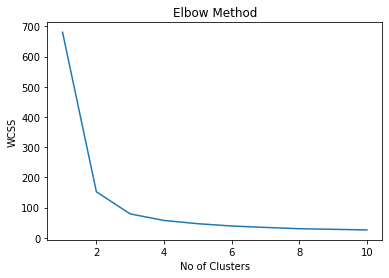

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.show()

### Fit the model

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans

KMeans(n_clusters=3, random_state=0)

### Predict

In [ ]:
y_pred=kmeans.fit_predict(x)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Visualize the cluster

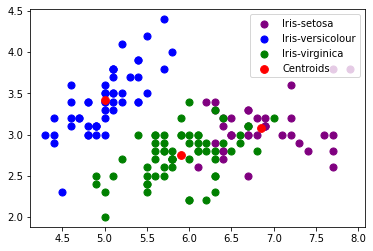

In [ ]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],s=50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 60, c = 'red', label = 'Centroids')
plt.legend(loc='upper right')